In [3]:
import pandas as pd
data =  pd.read_csv('insurance.csv');
data

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


Before cleaning and After cleaning


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>]], dtype=object)

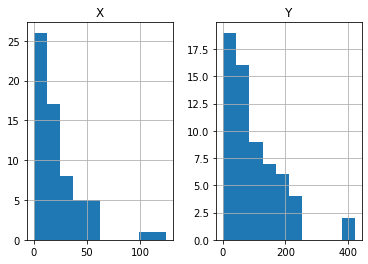

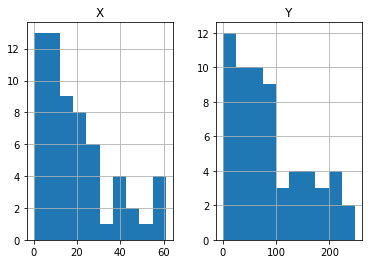

In [42]:
print('Before cleaning and After cleaning')
data.hist()
cleaned_data = data[data['X'] < 100]
cleaned_data.hist()

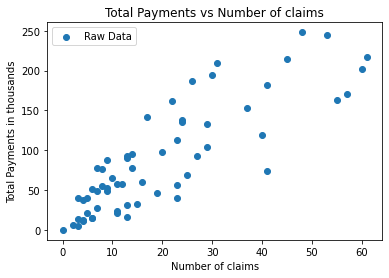

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = cleaned_data['X']
y = cleaned_data['Y']
plt.scatter(x,y, label='Raw Data')
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.title('Total Payments vs Number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments in thousands')
plt.legend()

## Data splitting

In [34]:
dataset = pd.DataFrame()
dataset['X'] = cleaned_data['X']
dataset['Y'] = cleaned_data['Y']
dataset_copy = dataset.copy()
dataset_train = dataset_copy.sample(frac=0.78, random_state=0)
dataset_test = dataset_copy.drop(dataset_train.index)

## Simple Regression

### The highlight of this algorithm is to solve a line equation.

```
Y=b0+b1∗X1
```
#### Xn - input feature; b1, b0 - coefficients; Y - Output 

### Our main aim is to solve the coefficients

#### Firstly b1, the slope of the line

```
b1=∑(x−<mean of x>)(y−<mean of y>)/∑(x−<mean of x>)2
```

#### Next b0, the intercept

```
b0=<mean of y>-b1∗<mean of x>
```

In [6]:
def find_coefficients(data, coefficients):
    x,y = data['X'], data['Y']
    x_bar, y_bar = x.mean(), y.mean()
    x,y = x.to_numpy(), y.to_numpy()
    b1 = sum(((x-x_bar) * (y-y_bar)) / sum((x-x_bar)**2))
    b0 = y_bar-b1*x_bar
    coefficients['b0'] = b0
    coefficients['b1'] = b1

In [7]:
def y_predict(x, coefficients):
    return coefficients['b0']+coefficients['b1']*x    

## When using random coefficients

In [8]:
random_coefficients = {'b0':40, 'b1':4}
random_x = list(range(50))
random_predictions = [y_predict(x, random_coefficients) for x in random_x]

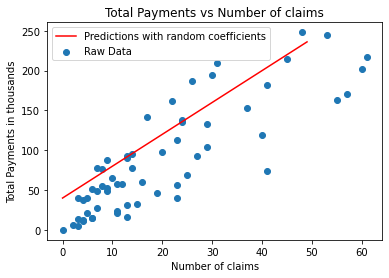

In [9]:
x = cleaned_data['X']
y = cleaned_data['Y']
plt.scatter(x,y, label='Raw Data')
plt.plot(random_x,random_predictions, label='Predictions with random coefficients', color='red')
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.title('Total Payments vs Number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments in thousands')
plt.legend()

## When using regression coefficients

In [20]:
coefficients = {'b0':-2, 'b1':1000}
find_coefficients(dataset_train,coefficients)
predictions = [y_predict(x, coefficients) for x in random_x]

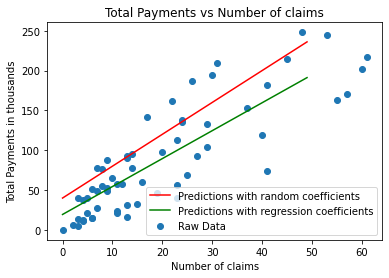

In [21]:
x = cleaned_data['X']
y = cleaned_data['Y']
plt.scatter(x,y, label='Raw Data')
plt.plot(random_x,random_predictions, label='Predictions with random coefficients', color='red')
plt.plot(random_x,predictions, label='Predictions with regression coefficients', color='green')
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.title('Total Payments vs Number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments in thousands')
plt.legend()

## Calculating Fitting using train and test datasets

### Root mean square error value is used to analyse the model fitting. It is the root of the squared distances between the prediction line and the actual points.

```
RMSE of test is much greater than RMSE of train => OVER FITTING of the data.
RMSE of test is much lesser than RMSE of train => UNDER FITTING of the data.
```

In [23]:
def rmse(y, y_predictions):
    rmse = np.sqrt(sum((y - y_predictions) ** 2) / len(y))
    return rmse

## Calculating Fitting for training dataset

RMSE for train: 36.469


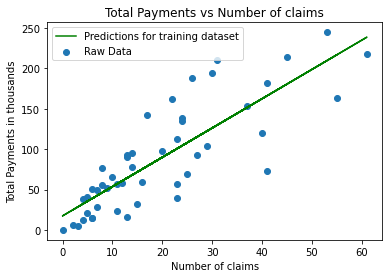

In [35]:
train_coefficients = {'b0':-2, 'b1':1000}
find_coefficients(dataset_train,train_coefficients)
y_predictions_train = [y_predict(x, train_coefficients) for x in dataset_train['X']]

x = dataset_train['X']
y = dataset_train['Y']
plt.scatter(x,y, label='Raw Data')
plt.plot(x,y_predictions_train, label='Predictions for training dataset', color='green')
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.title('Total Payments vs Number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments in thousands')
plt.legend()

print('RMSE for train: %.3f' % (rmse(dataset_train['Y'],y_predictions_train)))

## Calculating Fitting for testing dataset

RMSE for test: 32.416


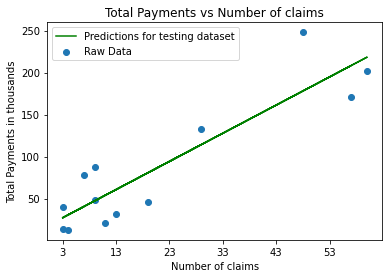

In [37]:
test_coefficients = {'b0':-2, 'b1':1000}
find_coefficients(dataset_test,test_coefficients)
y_predictions_test = [y_predict(x, test_coefficients) for x in dataset_test['X']]

x = dataset_test['X']
y = dataset_test['Y']
plt.scatter(x,y, label='Raw Data')
plt.plot(x,y_predictions_test, label='Predictions for testing dataset', color='green')
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.title('Total Payments vs Number of claims')
plt.xlabel('Number of claims')
plt.ylabel('Total Payments in thousands')
plt.legend()

print('RMSE for test: %.3f' % (rmse(dataset_test['Y'],y_predictions_test)))